In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
import glob
import fnmatch
import re
import argparse

import sys, getopt



In [2]:
def read_file(file_name_list):
    df_list =[]    
    _df = pd.DataFrame()

    for f in file_name_list:
        print(f)
        df_tmp = pd.read_csv(f, sep='\t', header=None) 
        #display(df_tmp.head())
        
        df_list.append(df_tmp)

    return pd.concat(df_list, axis=0)

In [3]:
base_path = '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data'
file_path = os.path.join(base_path,'*.dat')

file_name_list =  glob.glob(file_path) 
print(file_name_list)

['/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00052.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00046.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00091.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00085.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00126.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00132.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00133.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00127.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00084.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00090.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00047.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00053.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00045.dat', '/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00051.dat', '/Users/bordoni/pro

In [4]:
print('reading ' , len(file_name_list), 'files') 

reading  228 files


In [5]:
df_wf_raw = read_file(file_name_list)
df_wf_raw.head()

/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00052.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00046.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00091.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00085.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00126.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00132.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00133.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00127.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00084.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00090.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00047.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00053.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00045.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00051.dat
/Users/bordoni/protoDUNE/XeDoping/SiPM-XArapuca/data/C2wf00079

NameError: name 'df_wf_raw' is not defined

In [8]:
df_wf.head()

,0,1,2,3,4,5,6,7,8,9,...,49995,49996,49997,49998,49999,50000,50001,50002,50003,50004
0,e,/pro,2020/3/2 20:59:48.8819720370000,5120,5120,5120,4864,5632,5120,5120,...,4864,4864,4352,4864,5376,4608,5120,4864,4864,5120
0,e,/pro,2020/3/2 20:45:24.4947146740000,5632,5120,5120,5376,4864,5120,5376,...,5376,4864,5120,4864,4608,4608,5120,5376,5120,5632
0,e,/pro,2020/3/3 1:13:0.8943310360000,4864,5376,4864,4864,4864,4608,4608,...,4864,5120,4608,4864,5120,4864,5120,5120,4864,5120
0,e,/pro,2020/3/3 0:2:28.7078330690000,4864,5120,5120,4608,4864,5376,4864,...,4864,4864,5376,5376,5120,5376,4864,4864,5376,4864
0,e,/pro,2020/3/3 5:5:28.5096807690000,5120,4864,5120,5120,5120,5376,4864,...,4864,4864,4864,5120,4608,5120,5120,4352,4864,5376


In [9]:
ped   = list(range(10, 2000))   # to estimate the pedestal
rowin = list(range(3, 50004))   # all readout window
wf    = list(range(4000, 20000))  # waveform 
tail  = list(range(40500, 50000)) # to estimate the single p.e.

def defineRoI():
    
    print('Defined Region of Interest: ' )
    print('Pedestal region (ped)  : [', min(ped)  , ',' , max(ped)  , ']'  ) 
    print('Readout window (rowin) : [', min(rowin), ',' , max(rowin), ']'  ) 
    print('Waveform (wf)          : [', min(wf)   , ',' , max(wf)   , ']'  ) 
    print('Waveform tail (tail)   : [', min(tail) , ',' , max(tail) , ']'  ) 

    return ped, rowin, wf, pe


In [24]:
def do_reindex(df):
    df = df.copy()
    df.reset_index(inplace=True, drop=True)
    return df


def convert_time(df):
    df = df.copy()
    df[2] =  pd.to_datetime(df[2], format='%Y/%m/%d %H:%M:%S.%f')
    return df

#
# Flag the saturated waveform
###
def flag_saturated(df, val=10000):
    df=df.copy()
    df['Saturated']=(df[rowin].max(axis=1) >= val)
    return df


def compute_pedestal(df):
    df=df.copy()
    df['Pedestal']=df[ped].sum(axis=1)/len(ped)
    return df

def subtract_pedestal(df):
    df = df.copy()
    df[rowin] = df[rowin].subtract(df['Pedestal'], axis=0)
    return df

def remove_noise(df):
    df=df.copy()
    df[rowin]= df[rowin].rolling(window=250,  axis=1).mean()
    return df


def has_signal_new(df):
    df = df.copy()
    
    df_sig = df.apply(lambda x: find_signal(x, wf), axis=1)    
    df = pd.concat([df, df_sig], axis =1)

    return df


def find_signal(x, myrange):
    
    x = x[min(myrange) : max(myrange)]

    peaks, properties = find_peaks(x, height=[15,2000], width=10)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0

    return pd.Series([(npeaks>0), height, area], index=['hasSignal', 'signal height', 'signal area'])




In [25]:
#
# Routine to prepare datasets: check for possible saturation and compute, subtract pedestal 
##
def prepare_dataset(_df):

    _df = _df.copy()        
    print('preparing dataframe for channel : ') 
    _df = do_reindex(_df)
    _df = convert_time(_df)
    #_df = define_channel(_df)
    #_df = do_reindex(_df)
    _df = flag_saturated(_df, 65536)
    _df = compute_pedestal(_df)
    _df = subtract_pedestal(_df)
    _df = remove_noise(_df) 
    _df = has_signal_new(_df)
    #_df = compute_singlepe(_df)
    #_df = select_singlepe(_df)
    #_df = tagGoodwf(_df)        

    print('done!')

    return _df


In [26]:
df_wf_proces = prepare_dataset(df_wf)

preparing dataframe for channel : 
done!


In [95]:
#df_wf.reset_index(inplace=True, drop=True)
df_wf.head()

,0,1,2,3,4,5,6,7,8,9,...,49995,49996,49997,49998,49999,50000,50001,50002,50003,50004
0,e,/pro,2020/3/2 16:14:43.7845577990000,5120,5120,4608,4608,5376,4096,4864,...,4864,5376,4864,4864,5120,4864,4864,5120,4608,4608
0,e,/pro,2020/3/2 16:15:10.9128403050000,5120,5120,4864,4864,5376,4864,4864,...,5120,5632,5120,5120,5888,5376,5376,5632,5632,5888
0,e,/pro,2020/3/2 15:55:15.7820988250000,5376,4864,5120,5120,4864,5120,5632,...,5632,4864,4864,5376,5120,4864,5120,5120,5120,5632
0,e,/pro,2020/3/2 15:59:20.5248295700000,4608,5120,4608,4864,5120,4864,4864,...,4864,4608,4864,4608,4864,4608,5120,5376,4864,5120
0,e,/pro,2020/3/2 16:14:11.7870000000000,5120,5632,5376,5376,5632,4608,5376,...,5120,5376,4864,5120,5376,4864,4864,5376,5376,4864


In [281]:
df_wf_proces.head(10)

,0,1,2,3,4,5,6,7,8,9,...,50000,50001,50002,50003,50004,Saturated,Pedestal,hasSignal,signal height,signal area
0,e,/pro,2020-03-02 20:59:48.881972037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-74.523015,-69.403015,-66.843015,-71.963015,5120,False,5074.203015,True,40.676985,626.942714
1,e,/pro,2020-03-02 20:45:24.494714674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.228141,63.228141,60.668141,60.668141,5632,False,5043.971859,True,47.868141,1827.171055
2,e,/pro,2020-03-03 01:13:00.894331036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-71.782915,-66.662915,-61.542915,-66.662915,5120,False,4986.982915,True,58.777085,725.599196
3,e,/pro,2020-03-03 00:02:28.707833069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.488643,-79.488643,-76.928643,-71.808643,4864,False,5043.328643,True,30.591357,154.346131
4,e,/pro,2020-03-03 05:05:28.509680769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-163.492663,-160.932663,-168.612663,-168.612663,5376,False,4999.332663,True,20.827337,-218.384724
5,e,/pro,2020-03-03 05:37:13.539925605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-120.448643,-120.448643,-115.328643,-115.328643,4864,False,4966.528643,True,153.471357,6465.633769
6,e,/pro,2020-03-03 05:48:48.673000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-461.520402,-456.400402,-456.400402,-451.280402,4352,False,4956.880402,True,58.159598,578.315578
7,e,/pro,2020-03-03 05:13:58.902000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-27.568241,-35.248241,-35.248241,-32.688241,4864,False,5027.248241,True,59.471759,1718.043015
8,e,/pro,2020-03-03 00:00:28.611624651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-152.750955,-147.630955,-145.070955,-147.630955,5376,False,4975.790955,True,18.769045,173.179497
9,e,/pro,2020-03-03 01:12:43.889768515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.782312,-55.342312,-55.342312,-52.782312,5120,False,5001.262312,True,18.897688,303.019095


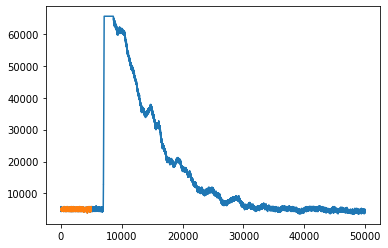

In [283]:
rowin = list(range(3, 50004))
ped = list(range(100, 5000))
#df_wf[3:50004].plot()
df_wf.iloc[23,rowin].plot()
df_wf.iloc[23,ped].plot()


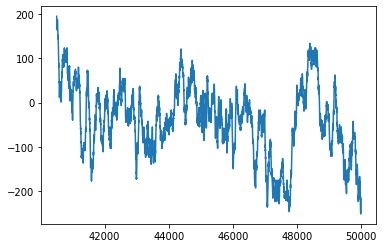

In [33]:
df_wf_proces.iloc[100,tail].plot()
#df_wf_proces.iloc[2,ped].plot()

In [282]:
df_wf_proces.loc[(df_wf_proces['Saturated']==True)]

,0,1,2,3,4,5,6,7,8,9,...,50000,50001,50002,50003,50004,Saturated,Pedestal,hasSignal,signal height,signal area
23,e,/pro,2020-03-03 01:35:05.903000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-547.428342,-544.868342,-544.868342,-542.308342,4352,True,5012.068342,True,15.771658,-87.117186
25,e,/pro,2020-03-02 23:32:14.587665954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-316.269347,-308.589347,-308.589347,-306.029347,4864,True,4988.269347,True,37.010653,1396.254874
31,e,/pro,2020-03-02 23:47:41.668584963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-621.539698,-624.099698,-626.659698,-621.539698,4352,True,4986.339698,True,72.220302,2961.199598
34,e,/pro,2020-03-03 05:54:51.755795220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-648.143116,-645.583116,-640.463116,-640.463116,4352,True,4931.023116,True,278.576884,2739.688844
42,e,/pro,2020-03-02 20:27:06.540624460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-222.488442,-214.808442,-217.368442,-214.808442,5120,True,5124.888442,True,15.591558,-2268.494472
80,e,/pro,2020-03-03 11:16:09.759999156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-755.354372,-760.474372,-765.594372,-770.714372,4352,True,5022.874372,True,79.205628,751.096281
88,e,/pro,2020-03-03 13:57:40.782187749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1048.725226,-1048.725226,-1046.165226,-1041.045226,4096,True,4970.645226,True,228.714774,2472.342513
95,e,/pro,2020-03-03 07:00:56.739975635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-255.086633,-255.086633,-255.086633,-255.086633,4864,True,4962.926633,True,46.993367,1130.027739
118,e,/pro,2020-03-03 06:53:41.566049174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-294.155578,-296.715578,-301.835578,-301.835578,4864,True,4917.515578,True,87.284422,1307.195176
125,e,/pro,2020-03-03 12:58:31.633673534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-370.145126,-370.145126,-370.145126,-375.265126,4352,True,5011.425126,True,26.654874,246.377487


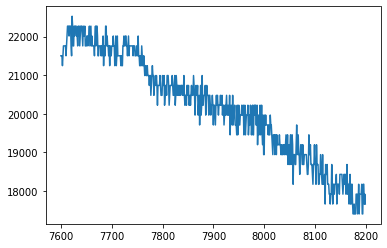

In [277]:
peak = list(range(7600, 8200))
df_wf.iloc[5,peak].plot()

In [111]:
df_wf.iloc[5,peak].max()

65536

In [66]:
df_test = df_wf[:10]
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,49995,49996,49997,49998,49999,50000,50001,50002,50003,50004
0,e,/pro,2020/3/2 20:59:48.8819720370000,5120,5120,5120,4864,5632,5120,5120,...,4864,4864,4352,4864,5376,4608,5120,4864,4864,5120
0,e,/pro,2020/3/2 20:45:24.4947146740000,5632,5120,5120,5376,4864,5120,5376,...,5376,4864,5120,4864,4608,4608,5120,5376,5120,5632
0,e,/pro,2020/3/3 1:13:0.8943310360000,4864,5376,4864,4864,4864,4608,4608,...,4864,5120,4608,4864,5120,4864,5120,5120,4864,5120
0,e,/pro,2020/3/3 0:2:28.7078330690000,4864,5120,5120,4608,4864,5376,4864,...,4864,4864,5376,5376,5120,5376,4864,4864,5376,4864
0,e,/pro,2020/3/3 5:5:28.5096807690000,5120,4864,5120,5120,5120,5376,4864,...,4864,4864,4864,5120,4608,5120,5120,4352,4864,5376


In [76]:
def test_remove_noise(df):
    df=df.copy()
    df[rowin]= df[rowin].rolling(window=250,  axis=1).mean()
    return df

In [77]:
df_test = test_remove_noise(df_test)

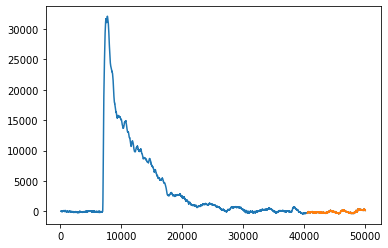

In [227]:
df_wf_proces.iloc[28,rowin].plot()
df_wf_proces.iloc[28,tail].plot()

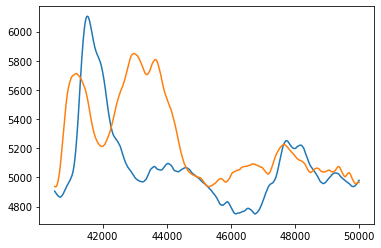

In [228]:
df_test.iloc[0,tail].plot()
df_test.iloc[8,tail].plot()

In [272]:
def find_singlePE(x, myrange):

    x = x[min(myrange) : max(myrange)]
    
    #peaks, properties = find_peaks(x, height=[10,30], width=30, distance = 50)    
    #peaks, properties = find_peaks(x, height=[5,20], prominence=[5,15], width=20, distance = 30)
    #peaks, properties = find_peaks(x, height=[600,1200], width=100, distance=1000, prominence=[1000,1400])
    peaks, properties = find_peaks(x, height=[2000,8000], width=600, distance=4000)
    peaks = peaks+min(myrange)
    
    npeaks = len(peaks)  
    if (npeaks > 0):
        height = properties['peak_heights'][0]
        width  = properties['widths'][0]
        xlow   = int(properties['left_ips'][0])
        xhigh  = int(properties['right_ips'][0])
        area   = x[xlow :xhigh].sum() 
    else :
        height = 0
        width  = 0
        area   = 0
        
    return pd.Series([npeaks, height, width, area], index=['n pe', 'pe height', 'pe width', 'pe area'])




def compute_singlepe(df):
    df = df.copy()

    df_pe = df.apply(lambda x: find_singlePE(x, tail), axis=1)    
    df = pd.concat([df, df_pe], axis =1)
    
    return df

In [262]:
def find_pe_2(df, iwf):
    
    #pe_range= tail
    #print(pe_range)
    pe_range    = list(range(40500, 50000)) 
    #rowin = list(range(200, 800))
    #rowin = list(range(200,1500))
    x = df.iloc[iwf][pe_range]
    
    plt.plot(x)
    #df.iloc[iwf][rowin].plot()
    #peaks, properties = find_peaks(x, prominence=[5,20], width=20)
    #properties["prominences"], properties["widths"]
    #peaks, properties = find_peaks(x, height=[10,1000], prominence=[100,1200], width=8000, distance = 5000)
    peaks, properties = find_peaks(x, height=[600,1200], width=100, distance=1000, prominence=[1000,1400])
    properties["peak_heights"], properties["widths"]
    
    print(properties["peak_heights"])
    print(properties["widths"])
    
    #print('peak x position', x[peaks])
        
    
    peaks = peaks+min(pe_range)
    print('here' , peaks)
    #peaks
    plt.plot(peaks, x[peaks], "x")
  
    plt.vlines(x=peaks, ymin=x[peaks] - properties["peak_heights"],
               ymax = x[peaks], color = "C1")
    plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"]+min(pe_range),
               xmax=properties["right_ips"]+min(pe_range), color = "C1")
    plt.xlabel('time ticks')
    plt.ylabel('ADC counts')
    
    
    plt.show()
    
    
    return peaks, properties

[1110.75698492]
[868.33333333]
here [41365]


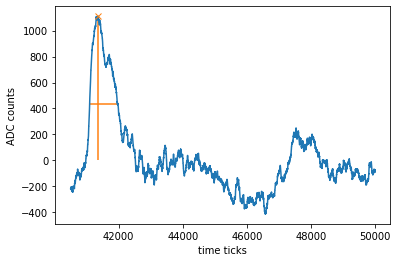

In [276]:
peaks, properties = find_pe_2(df_wf_proces, 0)

In [273]:
df_wf_spe = compute_singlepe(df_wf_proces)

In [274]:
df_wf_spe.head()

,0,1,2,3,4,5,6,7,8,9,...,50004,Saturated,Pedestal,hasSignal,signal height,signal area,n pe,pe height,pe width,pe area
0,e,/pro,2020-03-02 20:59:48.881972037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5120,False,5074.203015,True,40.676985,626.942714,0,0,0,0
1,e,/pro,2020-03-02 20:45:24.494714674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5632,False,5043.971859,True,47.868141,1827.171055,0,0,0,0
2,e,/pro,2020-03-03 01:13:00.894331036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5120,False,4986.982915,True,58.777085,725.599196,0,0,0,0
3,e,/pro,2020-03-03 00:02:28.707833069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4864,False,5043.328643,True,30.591357,154.346131,0,0,0,0
4,e,/pro,2020-03-03 05:05:28.509680769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5376,False,4999.332663,True,20.827337,-218.384724,0,0,0,0


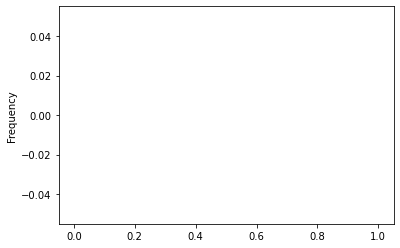

In [275]:
df_wf_spe.loc[(df_wf_spe['n pe']>0)]['pe area'].plot(kind='hist')